In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def original_function(x):
    return torch.sin(x) + x / 2.0

# 定义神经网络
class TwoLayerReLU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TwoLayerReLU, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x






Epoch [100/2000], Loss: 0.0623
Epoch [200/2000], Loss: 0.0296
Epoch [300/2000], Loss: 0.0202
Epoch [400/2000], Loss: 0.0168
Epoch [500/2000], Loss: 0.0149
Epoch [600/2000], Loss: 0.0136
Epoch [700/2000], Loss: 0.0124
Epoch [800/2000], Loss: 0.0113
Epoch [900/2000], Loss: 0.0103
Epoch [1000/2000], Loss: 0.0095
Epoch [1100/2000], Loss: 0.0087
Epoch [1200/2000], Loss: 0.0080
Epoch [1300/2000], Loss: 0.0073
Epoch [1400/2000], Loss: 0.0067
Epoch [1500/2000], Loss: 0.0062
Epoch [1600/2000], Loss: 0.0057
Epoch [1700/2000], Loss: 0.0052
Epoch [1800/2000], Loss: 0.0048
Epoch [1900/2000], Loss: 0.0045
Epoch [2000/2000], Loss: 0.0041


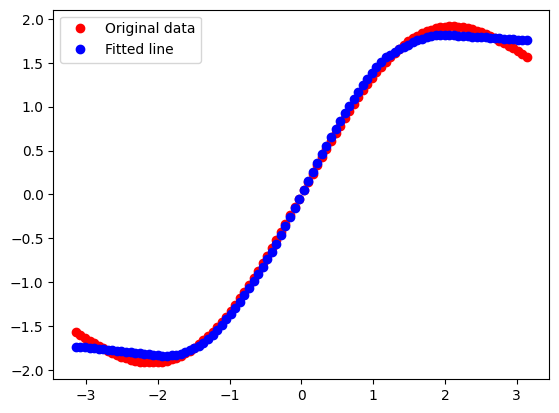

In [15]:
# 生成训练数据
x_train = torch.unsqueeze(torch.linspace(-np.pi, np.pi, 100), dim=1)  # 生成100个样本
y_train = original_function(x_train)

# 构建神经网络
input_size = 1
hidden_size = 100
output_size = 1
model = TwoLayerReLU(input_size, hidden_size, output_size)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 训练神经网络
num_epochs = 2000
for epoch in range(num_epochs):
    # 前向传播
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    
    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# 绘制拟合结果
model.eval()
with torch.no_grad():
    predicted = model(x_train)
    plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
    plt.plot(x_train.numpy(), predicted.numpy(), 'bo', label='Fitted line')
    plt.legend()
    plt.show()